In [1]:
%pip install stable-baselines3
%pip install PID

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def transfer_function(num, denum):
  """Pads list of poles and zeros.
    Assumes `num` < `denum`.
    Args:
      num: coefficients of the zeros [coeff_n, coeff_(n-1), ..., coeff_0]
      denum: coefficients of the poles: [coeff_n, coeff_(n-1), ..., coeff_0]
    Returns:
      tf: 2D numpy array [num, denum]
  """
  num = np.array(num, dtype=np.float64)
  denum = np.array(denum, dtype=np.float64)
  size = len(denum) - len(num)
  temp = np.zeros(size)
  num = np.concatenate((temp, num))
  tf = np.vstack((num, denum))
  return tf

In [4]:
def compute_roots(tf, gains):
  """Computes the roots of the characteristic equation of the closed-loop system
  of a given transfer function for a list of gain parameters.
  Concretely, given TF = zeros/poles, and a gain value K, we solve for the
  characteristic equation roots, that is the roots of poles + (K * zeros).
  Args:
    tf: transfer function.
    gains: list of gains.
  Returns:
    roots: numpy array containing the roots for each gain in gains.
  """
  num, denum = tf[0], tf[1]
  num_roots = len(np.roots(denum))
  roots = []

  for gain in gains:
    ch_eq = denum +  gain*num
    ch_roots = np.roots(ch_eq)
    ch_roots.sort()
    roots.append(ch_roots)

  # convert final roots list into array
  roots = np.vstack(roots)

  return roots

In [5]:
def plot_root_locus(gains, roots):
  """Plots the root locus of the closed loop system given the provided gains.
  """
  # get real and imaginary values
  real_vals = np.real(roots)
  imag_vals = np.imag(roots)

  # possible colors
  colors = ['b', 'm', 'c', 'r', 'g']

  # create figure and axis labels
  fig, ax = plt.subplots()
  ax.set_xlabel('Re')
  ax.set_ylabel('Im')
  ax.axvline(x=0, color='k', lw=1)
  ax.grid(True, which='both')

  # plots a blue "x" for the first roots
  ax.scatter(real_vals[0, :], imag_vals[0, :],
          marker='x',
          color='blue')

  # plots a red "o" for the last roots
  ax.scatter(real_vals[-1, :], imag_vals[-1, :],
          marker='o',
          color='red')

  gain_text = ['k = {:1.2f}'.format(k) for k in gains]

  temp_real_vals = real_vals[1:-1, :]
  temp_imag_vals = imag_vals[1:-1, :]
  color_range = range(temp_real_vals.shape[1])

  # plot the rest of the roots in different colors with respect to the regions
  for r, i, j in zip(temp_real_vals.T, temp_imag_vals.T, color_range):
    ax.plot(r, i, color=colors[j])

  return fig, ax

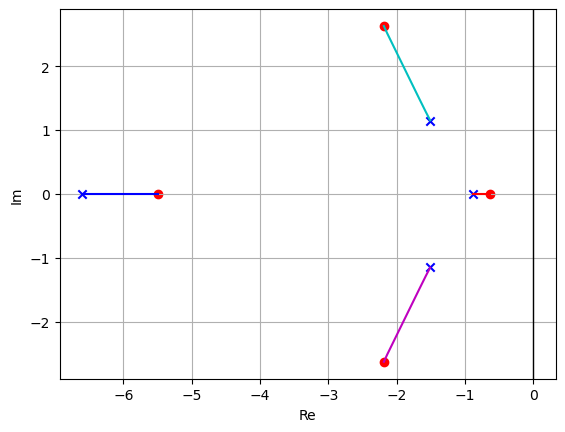

In [7]:
if __name__ == "__main__":
  # open loop transfer function
  num = [1, 4.25,2]
  denum = [1, 10.5, 32, 44.5, 21]
  GH = transfer_function(num, denum)

  # create a list of evenly spaced gains
  gains = np.linspace(0.0, 10.0, num=500)

  roots = compute_roots(GH, gains)
  fig, ax = plot_root_locus(gains, roots)
  plt.show()